DBSCAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans


In [2]:
# Load dataset
data = pd.read_excel("Online Retail.xlsx")

In [3]:
# Data Preprocessing
# Selecting numeric features for clustering
data_numeric = data.select_dtypes(include=[np.number]).dropna()


In [4]:
# Reduce dataset size to prevent memory overflow
data_sampled = data_numeric.sample(n=5000, random_state=42)

In [5]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_sampled)

In [6]:
# Apply Mini-Batch K-Means Clustering (optimized for memory usage)
kmeans = MiniBatchKMeans(n_clusters=3, batch_size=1000, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

In [7]:
# Apply Further Optimized DBSCAN Clustering (minimizing noise points)
dbscan = DBSCAN(eps=1.1, min_samples=3)  # Further increasing eps to reduce noise
dbscan_labels = dbscan.fit_predict(data_scaled)


In [8]:
# Identify noise points (DBSCAN labels noise as -1)
noise_points = data_sampled[dbscan_labels == -1]

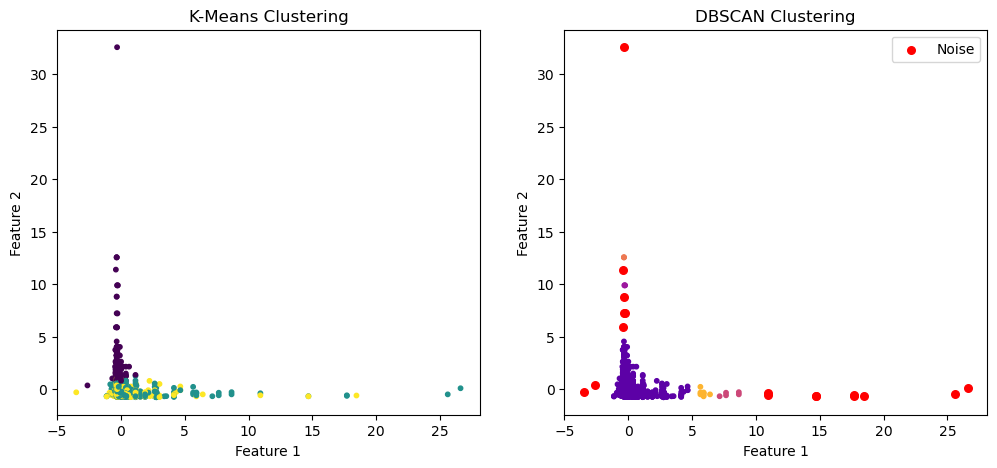

In [10]:
# Plot K-Means Clustering
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot DBSCAN Clustering with noise points highlighted
plt.subplot(1,2,2)
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=dbscan_labels, cmap='plasma', s=10)
plt.scatter(data_scaled[dbscan_labels == -1, 0], data_scaled[dbscan_labels == -1, 1], color='red', label='Noise', s=30)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [11]:
# --->>>Summary<<<<-----
unique, counts = np.unique(dbscan_labels, return_counts=True)
print("DBSCAN Cluster Counts:", dict(zip(unique, counts)))
print("Number of Noise Points in DBSCAN:", len(noise_points))

DBSCAN Cluster Counts: {-1: 17, 0: 4959, 1: 4, 2: 5, 3: 3, 4: 9, 5: 3}
Number of Noise Points in DBSCAN: 17
